In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./Input/pesticide_use.csv", encoding = "cp1252")

/tmp/ipykernel_18277/2370551333.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Input/pesticide_use.csv", encoding = "cp1252")


# Choise of unit = gram per International Dollar

In [3]:
# We are interested to work with this unit. One reason is, this is the only normalized unit of the bunch
# The value_counts() when filtered with this unit, shows just one item for the columns Item and Element.\
# Therefore no other factors
df = df[df["Unit"] == "g/Int$"]

# Continent-wise Descriptive statistics

In [4]:
# We'll do continent-wise analysis
continents_to_filter = ['Africa', 'Asia', 'Europe', 'Northern America', 'Central America', 'South America', 'Oceania']
filtered_df = df[df['Area'].isin(continents_to_filter)]

In [5]:
# We would group by Area, and find the Area's mean Value and sd of the Value
grouped_stats = filtered_df.groupby('Area')['Value'].agg(['mean', 'std'])

In [6]:
grouped_stats["Area"] = grouped_stats.index

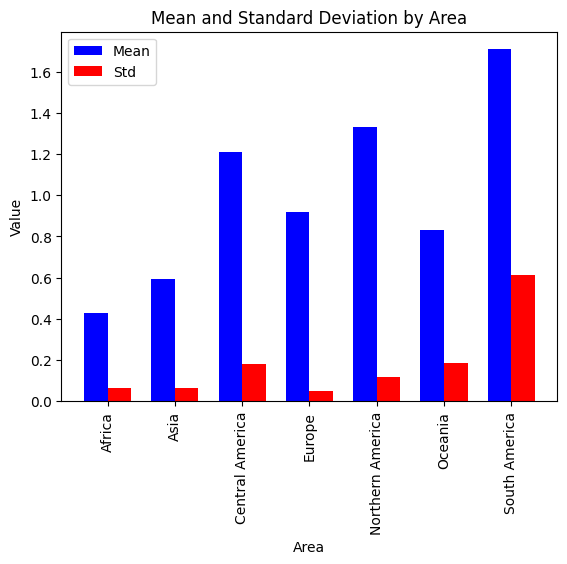

In [7]:
import matplotlib.pyplot as plt
df = grouped_stats

# Plotting grouped bar chart
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = range(len(df))

# Plotting bars for mean
bars1 = ax.bar(x, df['mean'], width=bar_width, label='Mean', color='b')

# Plotting bars for standard deviation
bars2 = ax.bar([p + bar_width for p in x], df['std'], width=bar_width, label='Std', color='r')

# Labeling the x-axis ticks with area names
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(df['Area'], rotation=90)

# Adding labels, title, and legend
ax.set_xlabel('Area')
ax.set_ylabel('Value')
ax.set_title('Mean and Standard Deviation by Area')
ax.legend()

# Show the plot
plt.show()


# Trend analysis of 7 regions (1990-2021)

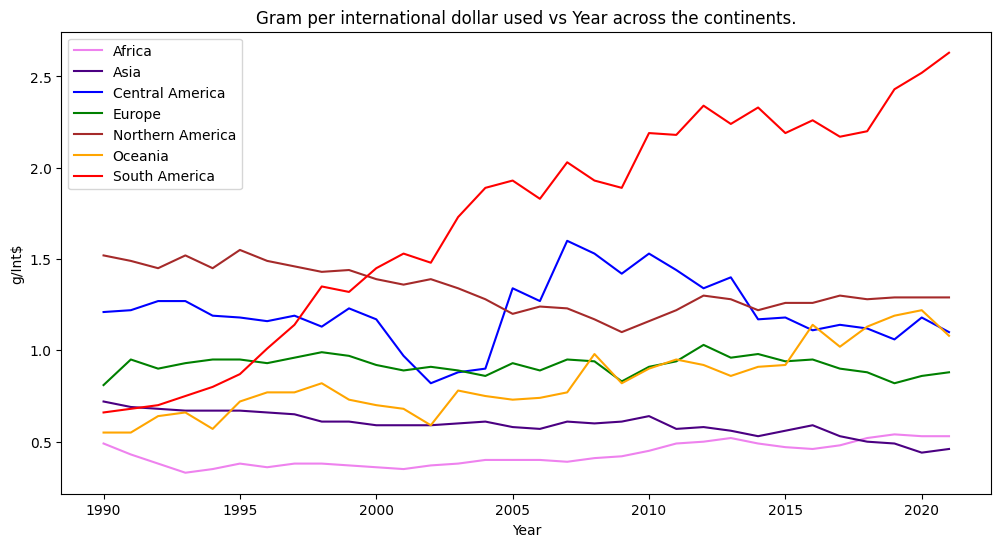

In [9]:
import matplotlib.pyplot as plt
groupedseries = filtered_df.groupby('Area')
listofdfs = [group for _, group in groupedseries]
colors = ['violet','indigo','blue','green','brown','orange','red']
plt.figure(figsize=[12,6])
for i in range(len(listofdfs)):
    temp = listofdfs[i]
    label = temp['Area'].unique()[0]
    plt.plot(
        temp['Year'],
        temp['Value'],
        marker = None,
        linestyle = '-',
        color = colors[i],
        label =label
    )
plt.xlabel('Year')
plt.ylabel('g/Int$')
plt.title('Gram per international dollar used vs Year across the continents.')
plt.legend()
plt.show()

# Method 1: Exploring the time-series

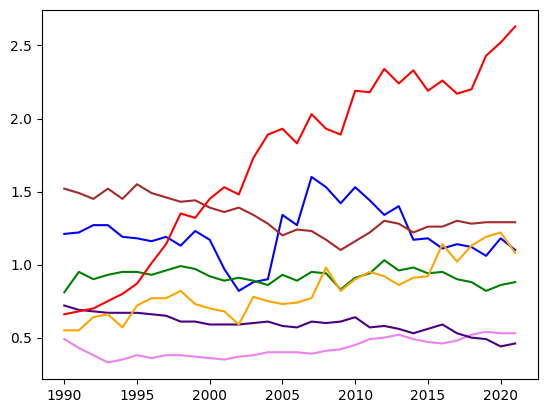

In [14]:
for i in range(len(listofdfs)):
    temp = listofdfs[i]
    label = temp["Area"].unique()[0]
    plt.plot(
        temp['Year'],
        temp['Value'],
        marker = None,
        linestyle = '-',
        color = colors[i],
        label =label
    )

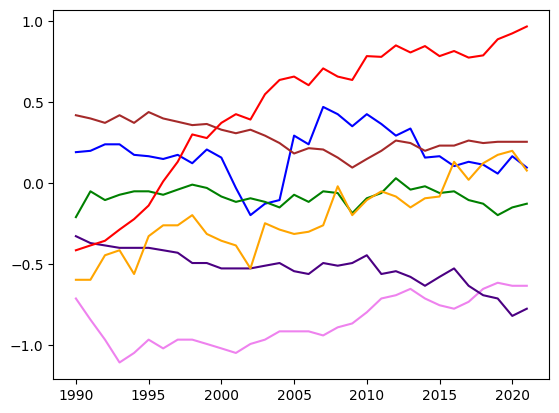

In [15]:
import numpy as np
for i in range(len(listofdfs)):
    temp = listofdfs[i]
    label = temp["Area"].unique()[0]
    temp['Value'] = np.log(temp['Value'])
    plt.plot(
        temp['Year'],
        temp['Value'],
        marker = None,
        linestyle = '-',
        color = colors[i],
        label =label
    )

In [16]:
# When the time series is harder to judge just by looking at the plot, we should move
# on to the next step

# Method 2: ACF plot and PACF plot

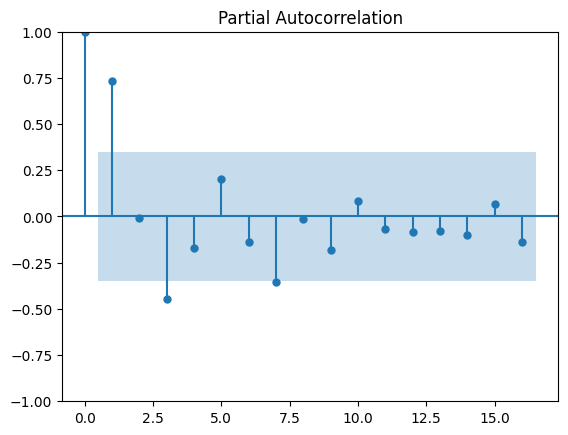

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
temp = listofdfs[2]
acf_original = plot_pacf(temp["Value"])

# Method 3: ADF test

In [34]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(temp["Value"])
print(f'p-value: {adf_test[1]}')

p-value: 0.975059846926073


In [ ]:
# Step 1: Check for stationarity of time series
#  Method 1: Time series plot
#  Method 2: ACF plot and PACF plot
#  Method 3: ADF test
# Step 2: Determine ARIMA model params p and q
# Step 3: Fit the ARIMA model
# Step 4: Make time series predictions
# (Optional): Auto-fit ARIMA model
# Step 5: Evaluate model predictions

/tmp/ipykernel_10713/722257608.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Mon, 24 Jun 2024   AIC                            408.969
Time:                        08:52:11   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

/tmp/ipykernel_10713/722257608.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


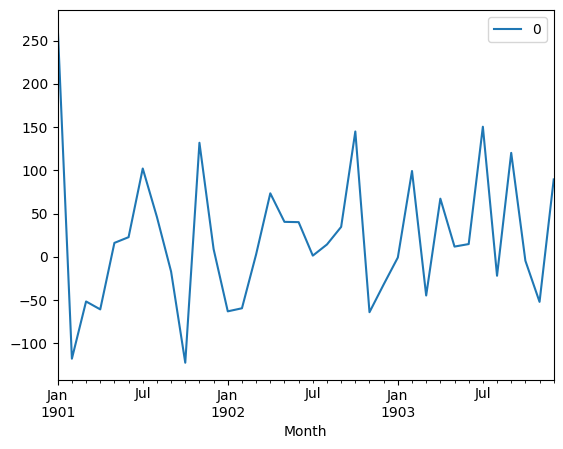

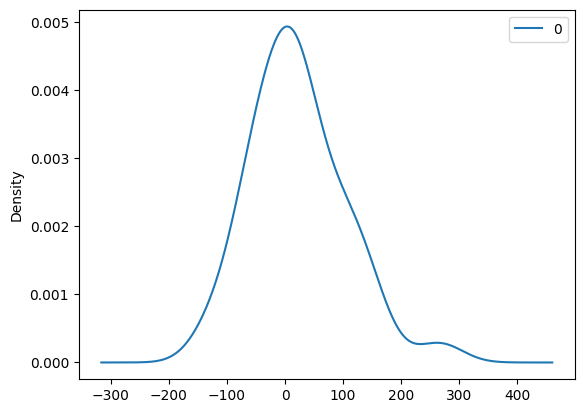

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [1]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())